<a href="https://colab.research.google.com/github/SirMosweu/Data-Analysis/blob/main/Retail%20Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETAIL STORE INVENTORY DATASET**

# Setup & Data Import
In this section, I import the necessary Python libraries (pandas, matplotlib, seaborn) and load the dataset.  
This establishes the foundation for all subsequent analysis, ensuring the data is accessible and ready for transformation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Retail_store_inventory.csv")   # or pd.read_excel("sales_data.xlsx")


# Data Cleaning & Derived Columns
Here, I prepare the dataset by converting dates into usable formats and creating new analytical fields.  
Derived columns such as **Year, Month, YearMonth, Effective Price, Sell-Through Rate, Event Flag, Day of Week, and Quarter**  
allow me to capture business insights that go beyond raw transactional data.  
This step mirrors the calculated fields I previously built in Excel but now in a scalable Python workflow.


In [2]:
# Convert Date
df['Date'] = pd.to_datetime(df['Date'])

# Derived columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')
df['EffectivePrice'] = df['Price'] * (1 - df['Discount'])
df['SellThroughRate'] = df['Units Sold'] / df['Inventory Level']
df['EventFlag'] = df['Holiday/Promotion'].apply(lambda x: 0 if x == "None" else 1)
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter


# Statistical Overview
This section provides a statistical profile of the dataset.  
I summarize central tendencies (mean, median), ranges, and distributions for key metrics such as Units Sold, Inventory Level, Price, and Discount.  
I also check for missing values and correlations.  
This ensures data quality and highlights potential outliers or anomalies before deeper analysis.


In [3]:
print(df.describe(include='all'))
print(df.isnull().sum())


                                 Date Store ID Product ID   Category Region  \
count                           73100    73100      73100      73100  73100   
unique                            NaN        5         20          5      4   
top                               NaN     S001      P0001  Furniture   East   
freq                              NaN    14620       3655      14699  18349   
mean    2022-12-31 23:59:59.999999744      NaN        NaN        NaN    NaN   
min               2022-01-01 00:00:00      NaN        NaN        NaN    NaN   
25%               2022-07-02 00:00:00      NaN        NaN        NaN    NaN   
50%               2023-01-01 00:00:00      NaN        NaN        NaN    NaN   
75%               2023-07-03 00:00:00      NaN        NaN        NaN    NaN   
max               2024-01-01 00:00:00      NaN        NaN        NaN    NaN   
std                               NaN      NaN        NaN        NaN    NaN   

        Inventory Level    Units Sold  Units Ordere

# Grouped Summaries
Here, I replicate the functionality of Excel PivotTables using pandas groupby and pivot_table.  
- **Event vs. Non-Event Sales**: Compares average sales on promotional vs. normal days.  
- **Sell-Through Rate by Category**: Evaluates inventory efficiency across product categories.  
- **Monthly Trend**: Tracks total units sold over time to identify seasonality.  
- **Category × Region Matrix**: Shows how product categories perform across different regions.  
These summaries provide structured insights into performance drivers.


In [4]:
# Event vs Non-Event
event_summary = df.groupby('EventFlag')['Units Sold'].mean()

# Sell-Through by Category
sell_through = df.groupby('Category')['SellThroughRate'].mean()

# Monthly trend
monthly_sales = df.groupby('YearMonth')['Units Sold'].sum()

# Category × Region matrix
category_region = df.pivot_table(
    index='Category',
    columns='Region',
    values='Units Sold',
    aggfunc='sum'
)


# Visualizations
I use matplotlib and seaborn to create clear, professional charts that communicate insights visually.  
- **Monthly Trend Line Chart**: Highlights seasonality and growth patterns.  
- **Sell-Through Rate by Category Bar Chart**: Identifies efficient vs. overstocked categories.  
- **Event vs. Non-Event Sales Bar Chart**: Shows the impact of promotions and holidays.  
- **Category × Region Heatmap**: Provides a matrix view of category performance across regions.  
These visuals transform raw numbers into compelling stories for decision-makers.


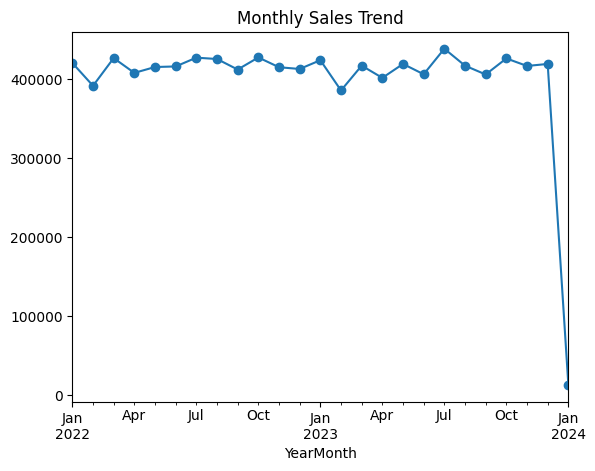

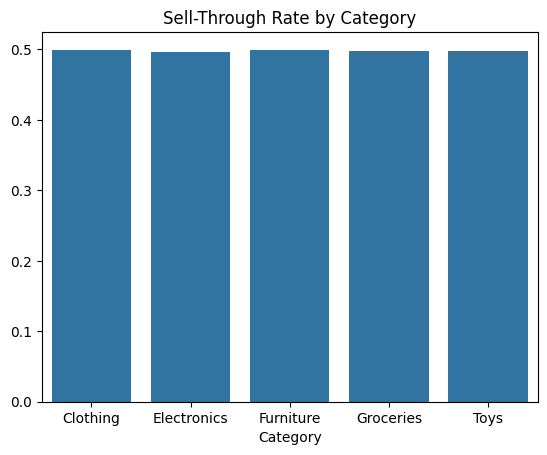

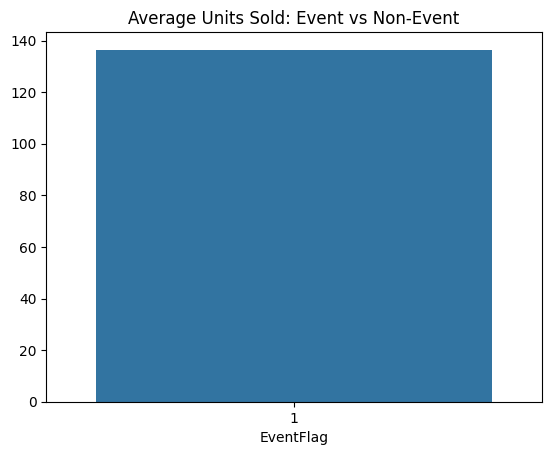

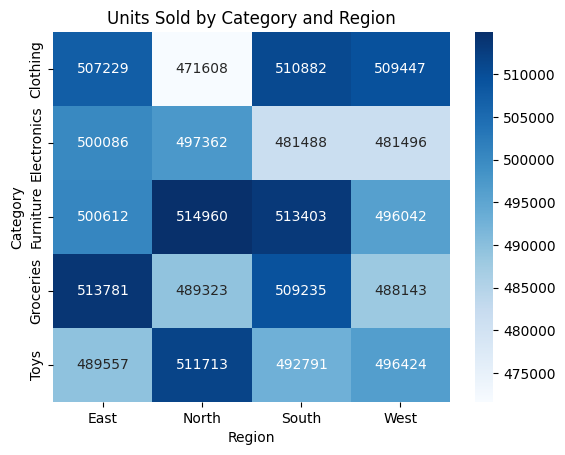

In [5]:
# Monthly trend line chart
monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend")
plt.show()

# Sell-Through Rate by Category
sns.barplot(x=sell_through.index, y=sell_through.values)
plt.title("Sell-Through Rate by Category")
plt.show()

# Event vs Non-Event Sales
sns.barplot(x=event_summary.index, y=event_summary.values)
plt.title("Average Units Sold: Event vs Non-Event")
plt.show()

# Category × Region Heatmap
sns.heatmap(category_region, annot=True, fmt=".0f", cmap="Blues")
plt.title("Units Sold by Category and Region")
plt.show()


# Executive KPIs
At the top of the dashboard, I calculate key performance indicators (KPIs) such as:  
- **Total Revenue**: Overall sales value after discounts.  
- **Average Discount**: Typical markdown applied across products.  
- **Average Sell-Through Rate**: Efficiency of inventory usage.  
These KPIs provide a quick snapshot of business health and complement the detailed analyses below.


In [6]:
total_revenue = (df['Units Sold'] * df['EffectivePrice']).sum()
avg_discount = df['Discount'].mean()
avg_sell_through = df['SellThroughRate'].mean()

print("Total Revenue:", total_revenue)
print("Average Discount:", avg_discount)
print("Average Sell-Through Rate:", avg_sell_through)


Total Revenue: -4975522111.240001
Average Discount: 10.009507523939808
Average Sell-Through Rate: 0.4980052241772487
